In [1]:
import time

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util import display_image

## goals
- object detection: separate foreground and background
- wants to
    - find meaningful lines in the borders
    - discriminate inside/outside borders
    
- cv.findContours(src, mode, method, \[, contours, hierarchy, offset\])
    - mode: contour offering method
    - method: approximation method        
    
- cv.drawCOntours(img, contours, contourIdx, color, thickness)
    - contourIdx: -1 for displaying all contours

## contours

In [2]:
img = cv.imread('../img/shapes.png')

In [3]:
img2 = img.copy()

In [4]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
# black: background
# white: foreground
ret, imthres = cv.threshold(imgray, 127, 255, cv.THRESH_BINARY_INV)

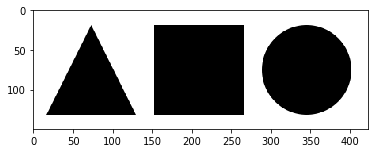

In [6]:
display_image(img)

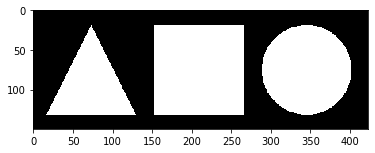

In [7]:
display_image(imthres)

* for cv 3.x

```python
_, contour, hierarchy = cv.findContours(imthres, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
```

In [8]:
# returns all coordinates corresponding to outermost contour
contour, hierarchy = cv.findContours(imthres, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# returns edge coordinates corresponding to outermost contour
contour2, hierarchy = cv.findContours(imthres, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [9]:
len(contour), len(contour2)

(3, 3)

In [10]:
# draw contour with green color (from all coordinates)
cv.drawContours(img, contour, -1, (0, 255, 0), 4)

# draw contour with green color (from edge coordinates)
cv.drawContours(img, contour, -1, (0, 255, 0), 4)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [11]:
# blue points for all coordinates
for i in contour:
    for j in i:
        cv.circle(img, tuple(j[0]), 1, (255, 0, 0), -1)

# blue points for edge coordinates
for i in contour2:
    for j in i:
        cv.circle(img2, tuple(j[0]), 1, (255, 0, 0), -1)

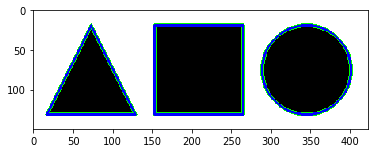

In [12]:
display_image(img)

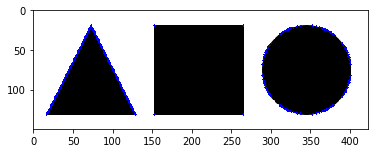

In [13]:
display_image(img2)

## RETR_TREE

In [15]:
img = cv.imread('../img/shapes_donut.png')
img2 = img.copy()

In [17]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [18]:
# convert to binary image
ret, imthres = cv.threshold(imgray, 127, 255, cv.THRESH_BINARY_INV)

In [19]:
# outmermost contour
contour, hierarchy = cv.findContours(imthres, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [21]:
# the number of contours, tree structure
print(len(contour), hierarchy)

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


In [22]:
# all contours with tree structure
contour2, hierarchy = cv.findContours(imthres, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [23]:
# the number of contours, tree structure
print(len(contour), hierarchy)

3 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


In [24]:
# draw outermost contour
cv.drawContours(img, contour, -1, (0, 255, 0), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
for idx, cont in enumerate(contour2):
    color = [int(i) for i in np.random.randint(0, 255, 3)]
    cv.drawContours(img2, contour2, idx, color, 3)
    cv.putText(img2, str(idx), tuple(cont[0][0]), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

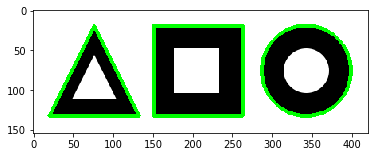

In [26]:
display_image(img)

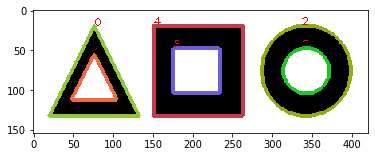

In [27]:
display_image(img2)

## image moment
- measurements for quantitative attributes of image

$$m_{p, q} = \sum_x \sum_y f(x, y)x^py^q$$

$$\mu_{p, q} = \sum_x \sum_y f(x, y)(x-\bar{x})^p(y-\bar{y})^q$$

- $\bar{x} = \frac{m_{10}}{m_{00}}$

### calculate center point, area, length

In [31]:
img = cv.imread('../img/shapes.png')

In [32]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [33]:
ret, th = cv.threshold(imgray, 127, 255, cv.THRESH_BINARY_INV)

In [34]:
contours, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [35]:
len(contours)

3

In [36]:
for c in contours:
    mmt = cv.moments(c)
    
    cx = int(mmt['m10'] / mmt['m00'])
    cy = int(mmt['m01'] / mmt['m00'])
    
    # area
    a = mmt['m00']
    # length
    l = cv.arcLength(c, True)
    # yellow center point
    cv.circle(img, (cx, cy), 5, (0, 255, 255), -1)
    
    # write area near the center point
    cv.putText(img, 'A:%.0f'%a, (cx, cy+20), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
    # write length near the start point
    cv.putText(img, 'A:%.0f'%l, tuple(c[0][0]), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
    
    # note that cv.contourArea and m10/m00, m01/m00 gives same results
    print('area:%.2f'%cv.contourArea(c, False))

area:9870.00
area:12544.00
area:6216.00


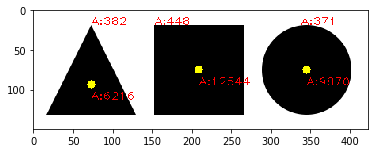

In [37]:
display_image(img)

### approximate contour
- cv.approxPolyDP(contour, epsilon, closed)

In [38]:
img = cv.imread('../img/bad_rect.png')
img2 = img.copy()

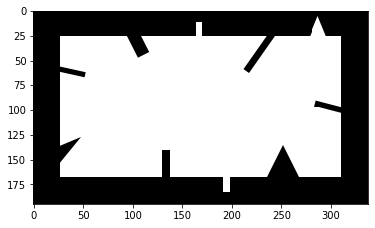

In [39]:
display_image(img)

In [40]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [41]:
ret, th = cv.threshold(imgray, 127, 255, cv.THRESH_BINARY)

In [42]:
contours, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [43]:
len(contours)

1

In [44]:
contour = contours[0]

In [46]:
# set error range as 5% of entire length
epsilon = 0.05 * cv.arcLength(contour, True)

In [51]:
# main function
approx = cv.approxPolyDP(contour, epsilon, True)

In [52]:
cv.drawContours(img, [contour], -1, (0, 255, 0), 3)
cv.drawContours(img2, [approx], -1, (0, 255, 0), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

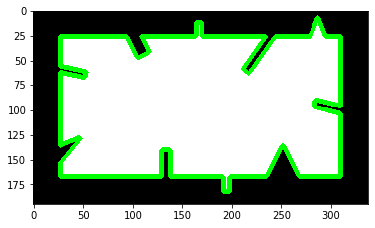

In [53]:
display_image(img)

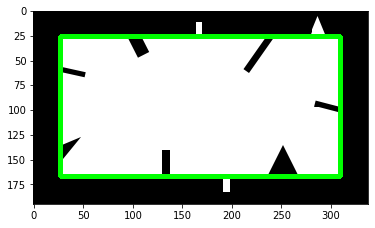

In [54]:
display_image(img2)

### c.f. using a convex hull

In [55]:
img = cv.imread('../img/hand.jpg')
img2 = img.copy()

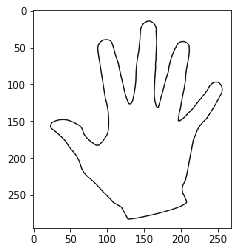

In [56]:
display_image(img)

In [57]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# convert background: black, foreground: white
ret, th = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

In [59]:
contours, _ = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [60]:
len(contours)

1

In [61]:
cntr = contours[0]

In [62]:
cv.drawContours(img, [cntr], -1, (0, 255, 0), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

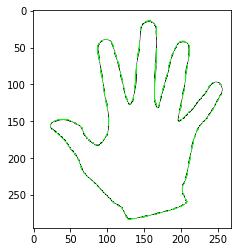

In [63]:
display_image(img)

In [64]:
# find convex hull (using a coordinate)
hull = cv.convexHull(cntr)

In [65]:
cv.drawContours(img2, [hull], -1, (0, 255, 0), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

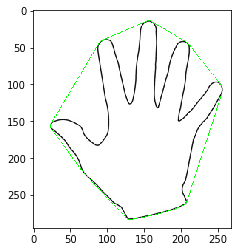

In [66]:
display_image(img2)

In [67]:
print(cv.isContourConvex(cntr), cv.isContourConvex(hull))

False True


In [68]:
# find a convex hull (using a index)
hull2 = cv.convexHull(cntr, returnPoints=False)

In [70]:
# find defects in convex hull
defects = cv.convexityDefects(cntr, hull2)

In [73]:
defects.shape

(19, 1, 4)

In [74]:
for i in range(defects.shape[0]):
    startP, endP, farthestP, distance = defects[i, 0]
    print(startP, endP, farthestP, distance)
    
    # find farthest point
    farthest = tuple(cntr[farthestP][0])    
    # distance as floating point
    dist = distance / 256.0
    
    if dist > 1:
        cv.circle(img2, farthest, 3, (0, 0, 255), -1)

373 375 374 114
375 433 400 19111
434 509 492 24464
509 511 510 162
0 2 1 162
2 91 35 23967
91 93 92 114
94 180 137 18631
180 182 181 114
183 185 184 114
185 217 198 1514
217 243 230 1173
245 247 246 217
247 255 248 201
255 263 256 186
263 267 266 211
267 277 268 162
277 285 278 114
286 372 329 4521


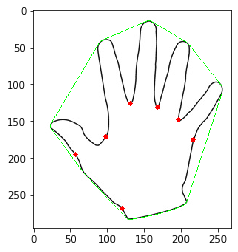

In [76]:
display_image(img2)